### EDA Project

I have selected the client Timothy Stevens who is a seller and who owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise.

To the following stake holder requirements I have formulated the following hypothesis.

**Hypothesis:**

1. Price adjustment to the expensive apartments can cause a sale within a period of one year.<br>
2. Renovating the current state of the apartments would lead to increase in profit margins.<br>
3. Homes in central zip codes have higher prices regardless of grade or condition.<br>

In [19]:
import pandas as pd
import numpy as np
from time import sleep
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import fsspec
from shapely.geometry import Point
import seaborn as sns
pd.__version__

'2.3.3'

# Hypothesis - 3

Proofs:<br>
Location-Price Correlation: Show distance_from_center has stronger correlation with price than grade or condition

Central vs Peripheral Premium: Prove central areas command higher prices regardless of quality

Quality Independence: Show that in central areas, even low-grade properties are expensive, and in peripheral areas, even high-grade properties are relatively cheap

Visual Evidence: The geographic map should show clear price clustering by location, not scattered randomly by quality

In [3]:
from eda_hypothesis import Hypothesis3

obj = Hypothesis3()
df = obj.prep_df()


47.56019729691877 0.12660596784988776 -122.21378370588236 0        0.065333
1        0.192167
2        0.178739
3        0.183496
4        0.178022
           ...   
21592    0.191913
21593    0.156263
21594    0.091824
21595    0.147046
21596    0.091713
Name: distance_from_center, Length: 21420, dtype: float64 0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594     True
21595    False
21596     True
Name: is_central, Length: 21420, dtype: bool
Correlation Matrix:
                      distance_from_center     price  price_per_sqft
distance_from_center              1.000000 -0.247832       -0.293673
price                            -0.247832  1.000000        0.556883
price_per_sqft                   -0.293673  0.556883        1.000000

Correlation Strength Comparison:
sqft_vs_price       : +0.702
grade_vs_price      : +0.668
distance_vs_price   : -0.248
condition_vs_price  : +0.035
T-test results: t=22.14, p-val

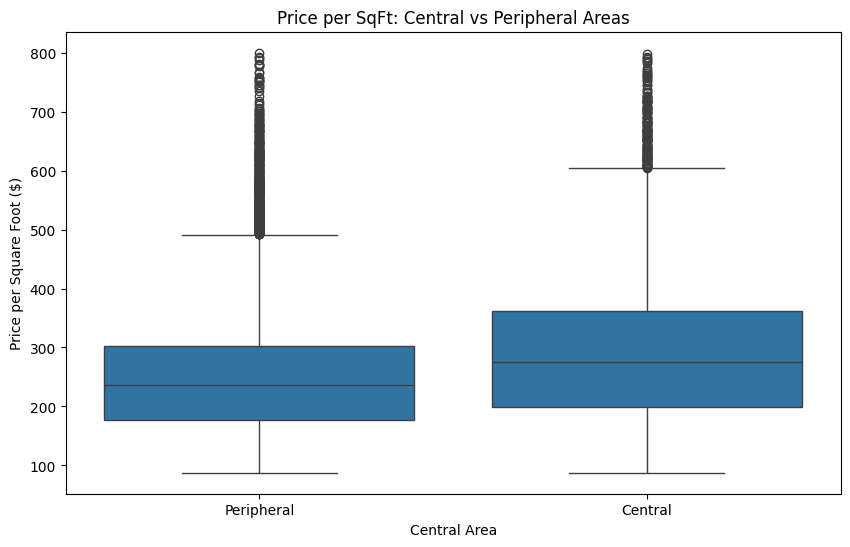

In [4]:
obj.vis_price_distr_cent(df)

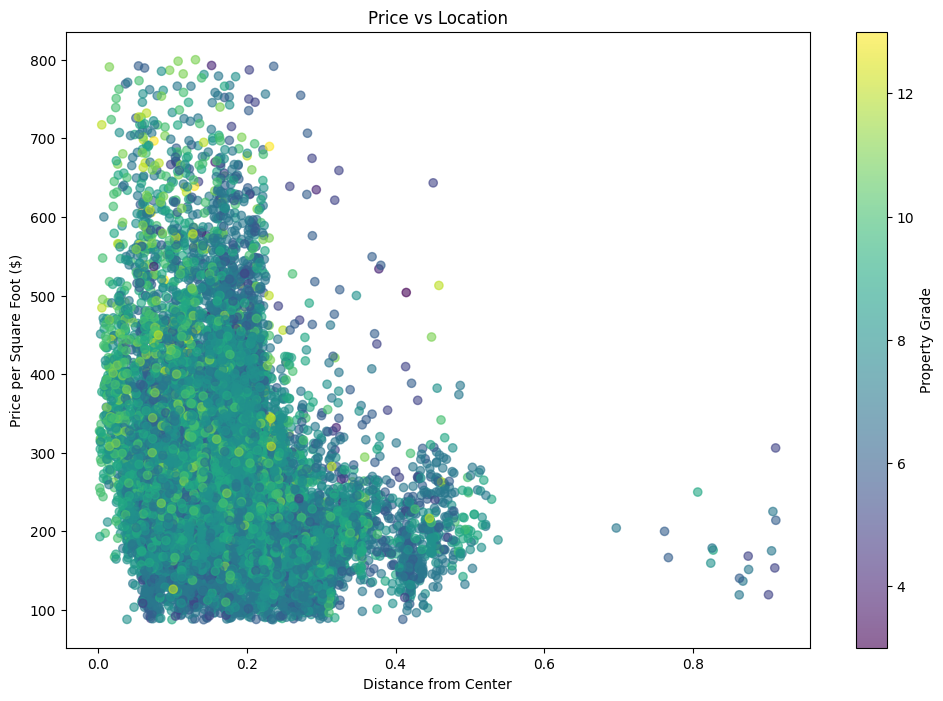

In [5]:
obj.vis_loc_vs_qlty_scatter(df)


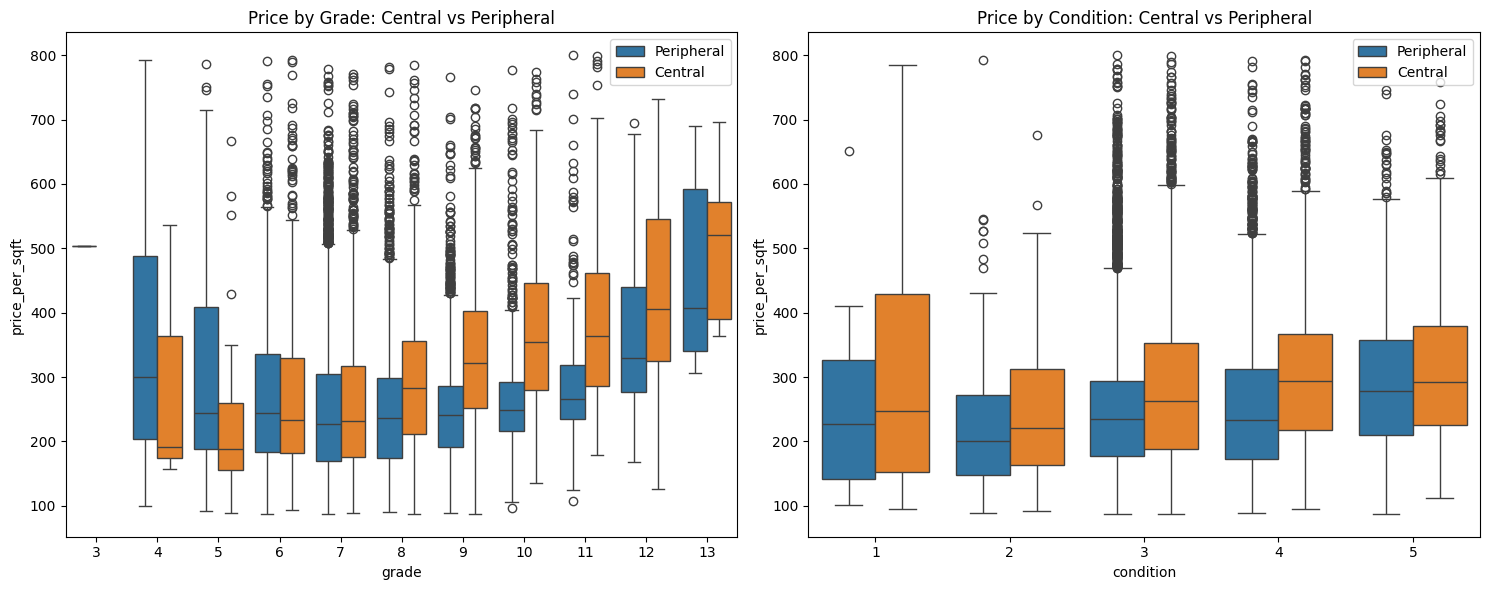

In [6]:
obj.vis_prc_by_grade_condition(df)

In [7]:
# Geographic Evidence
# Zip code analysis
zipcode_stats = df.groupby('zipcode').agg({
    'price_per_sqft': 'mean',
    'lat': 'mean', 
    'long': 'mean',
    'grade': 'mean',
    'condition': 'mean'
}).sort_values('price_per_sqft', ascending=False)

# Premium Quantification
# Calculate exact premium
central_avg = df[df['is_central']]['price_per_sqft'].mean()
peripheral_avg = df[~df['is_central']]['price_per_sqft'].mean()
premium_pct = ((central_avg - peripheral_avg) / peripheral_avg) * 100

print(f"Central area premium: {premium_pct:.1f}%")


Central area premium: 16.5%


In [8]:
import folium

m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=11)
for idx, row in df.sample(1000).iterrows():  # Sample for clarity
    color = 'red' if row['price_per_sqft'] > df['price_per_sqft'].quantile(0.75) else 'blue'
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=3,
        popup=f"${row['price_per_sqft']:.0f}/sqft<br>Grade: {row['grade']}",
        color=color,
        fill=True
    ).add_to(m)

# m.show_in_browser()

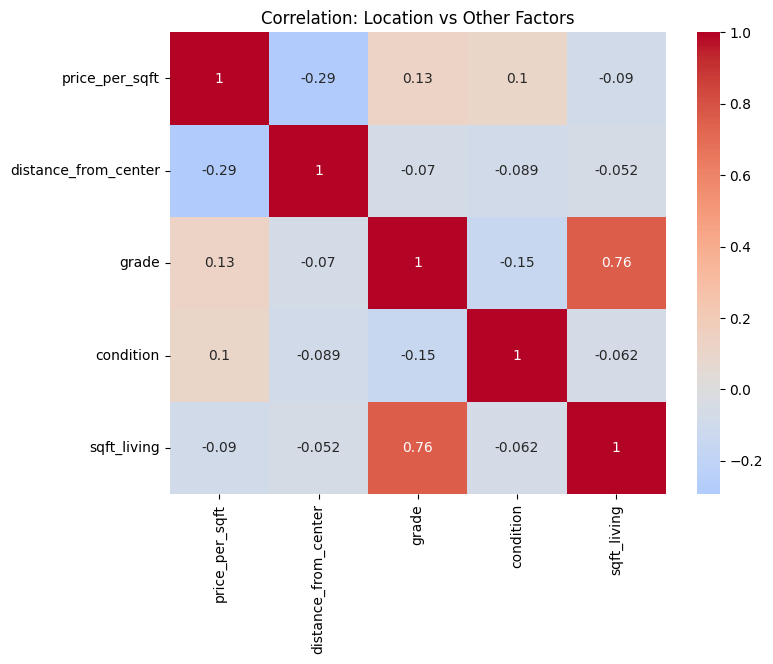

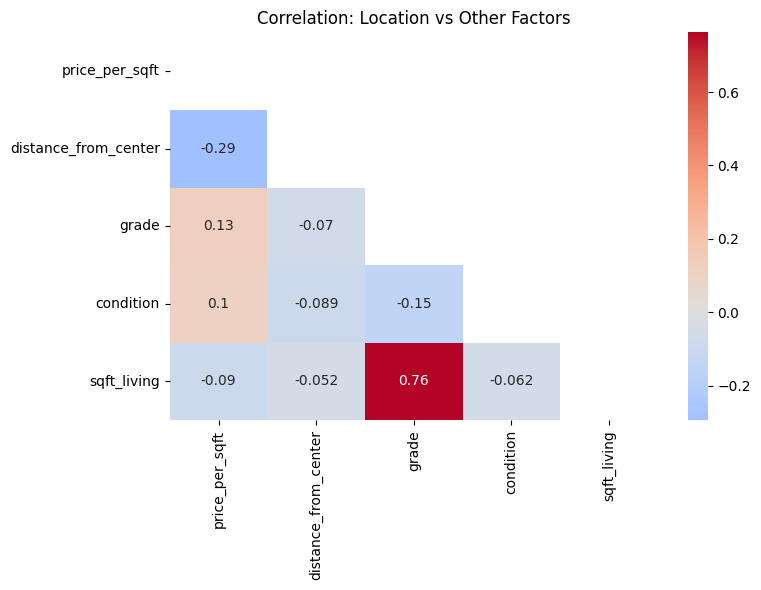

In [9]:
corr_matrix = df[['price_per_sqft', 'distance_from_center', 'grade', 'condition', 'sqft_living']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Location vs Other Factors')


# Compute correlation matrix
corr_matrix = df[['price_per_sqft', 'distance_from_center', 'grade', 'condition', 'sqft_living']].corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Location vs Other Factors')
plt.tight_layout()
plt.show()

Compelling Evidence:
                   Type  Avg_Price_SqFt  Avg_Grade
0      Central_LowGrade      260.557321   6.713899
1  Peripheral_HighGrade      280.947988  10.300306


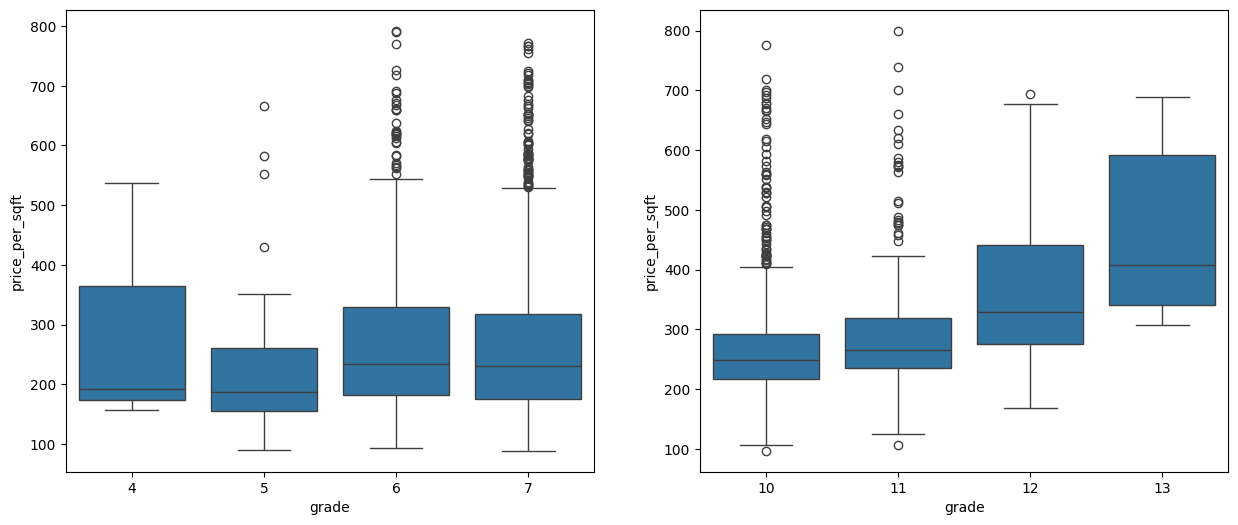

In [10]:
central_low_quality = df[(df['is_central']) & (df['grade'] <= 7)]
peripheral_high_quality = df[(~df['is_central']) & (df['grade'] >= 10)]

# Expected: central_low_quality.mean_price > peripheral_high_quality.mean_price

# Visualization: Side-by-side box plots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=central_low_quality, x='grade', y='price_per_sqft', ax=ax[0])
sns.boxplot(data=peripheral_high_quality, x='grade', y='price_per_sqft', ax=ax[1])

# Find specific examples that prove the point
examples = pd.DataFrame({
    'Type': ['Central_LowGrade', 'Peripheral_HighGrade'],
    'Avg_Price_SqFt': [
        central_low_quality['price_per_sqft'].mean(),
        peripheral_high_quality['price_per_sqft'].mean()
    ],
    'Avg_Grade': [
        central_low_quality['grade'].mean(),
        peripheral_high_quality['grade'].mean()
    ]
})

print("Compelling Evidence:")
print(examples)

# Hypothesis 2

In [11]:
from eda_hypothesis import Hypothesis2, Hypothesis3

obj2 = Hypothesis2()
df = obj2.prep_df()


47.56019729691877 0.12660596784988776 -122.21378370588236 0        0.065333
1        0.192167
2        0.178739
3        0.183496
4        0.178022
           ...   
21592    0.191913
21593    0.156263
21594    0.091824
21595    0.147046
21596    0.091713
Name: distance_from_center, Length: 21420, dtype: float64 0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594     True
21595    False
21596     True
Name: is_central, Length: 21420, dtype: bool
Correlation Matrix:
                      distance_from_center     price  price_per_sqft
distance_from_center              1.000000 -0.247832       -0.293673
price                            -0.247832  1.000000        0.556883
price_per_sqft                   -0.293673  0.556883        1.000000

Correlation Strength Comparison:
sqft_vs_price       : +0.702
grade_vs_price      : +0.668
distance_vs_price   : -0.248
condition_vs_price  : +0.035
T-test results: t=22.14, p-val

c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:260: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_premium = df.groupby('quality_tier')['price_per_sqft'].mean()
c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:261: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_premium = df.groupby('condition_tier')['price_per_sqft'].mean()


c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:356: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_price = df.groupby('quality_tier')['price_per_sqft'].mean()
c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:357: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_count = df.groupby('quality_tier').size()
c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:370: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

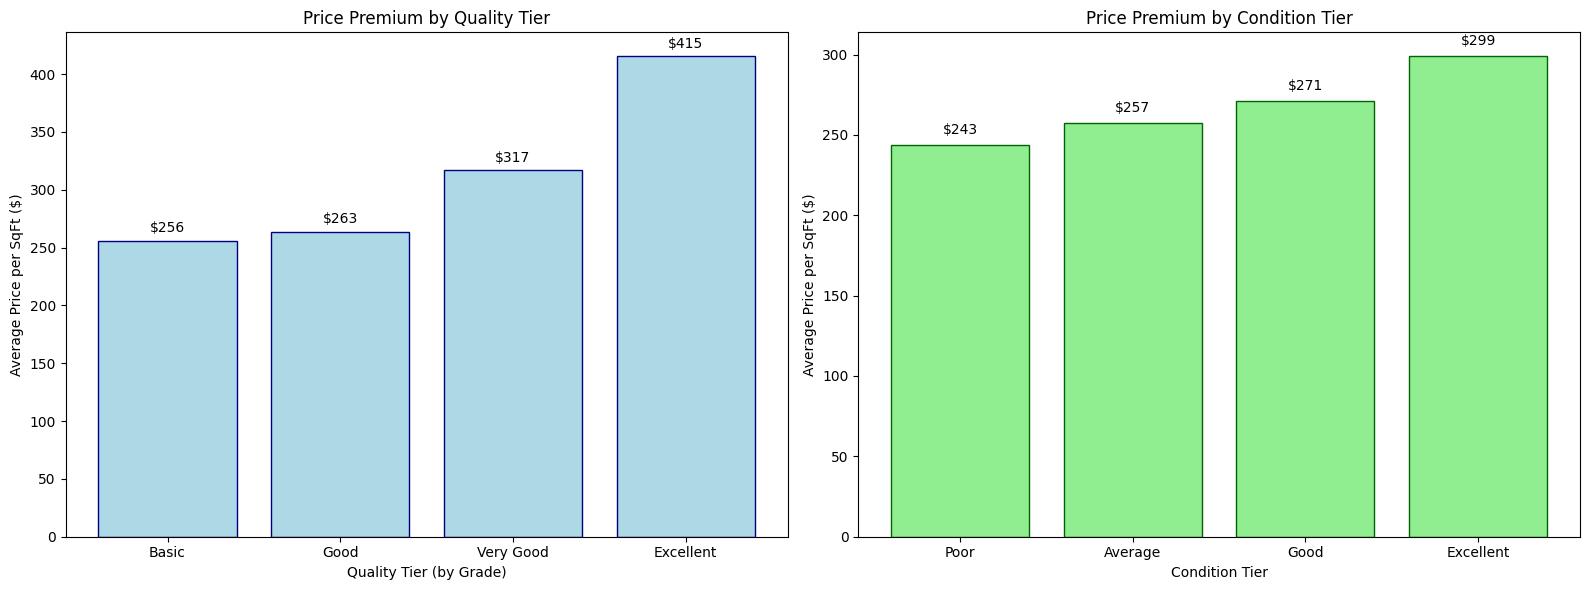

In [12]:
obj2.vis_qlty_roi(df)


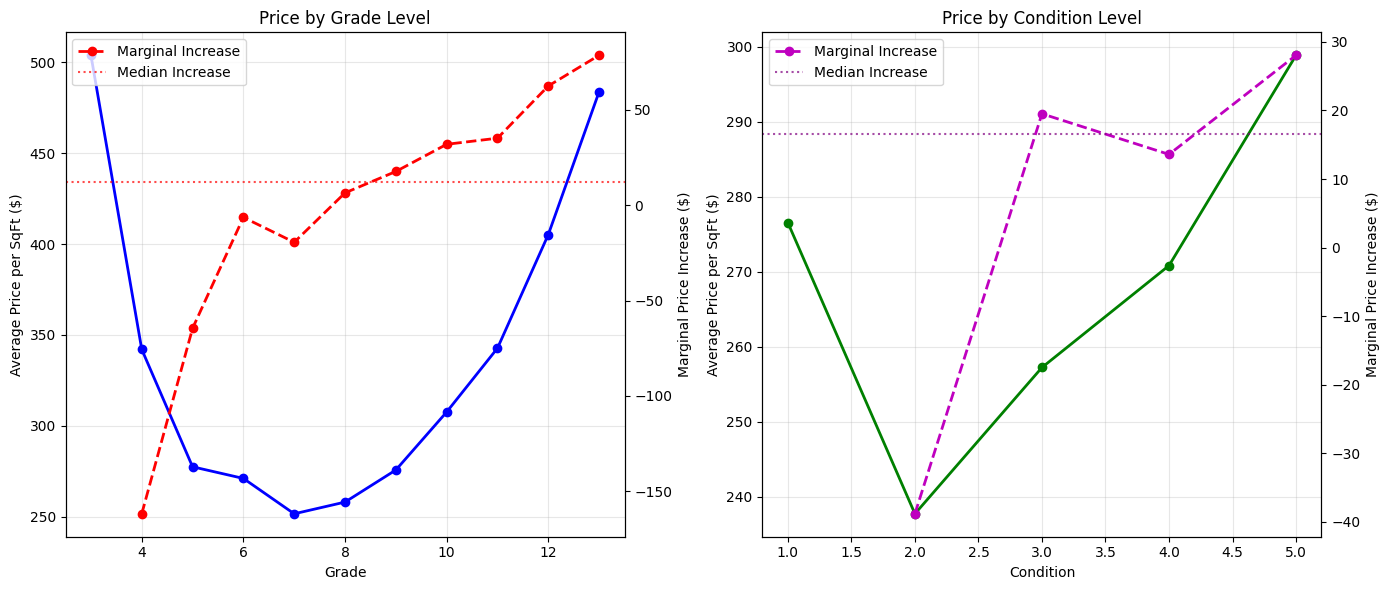

In [13]:
obj2.vis_dimnish_returns(df)


c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:433: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(


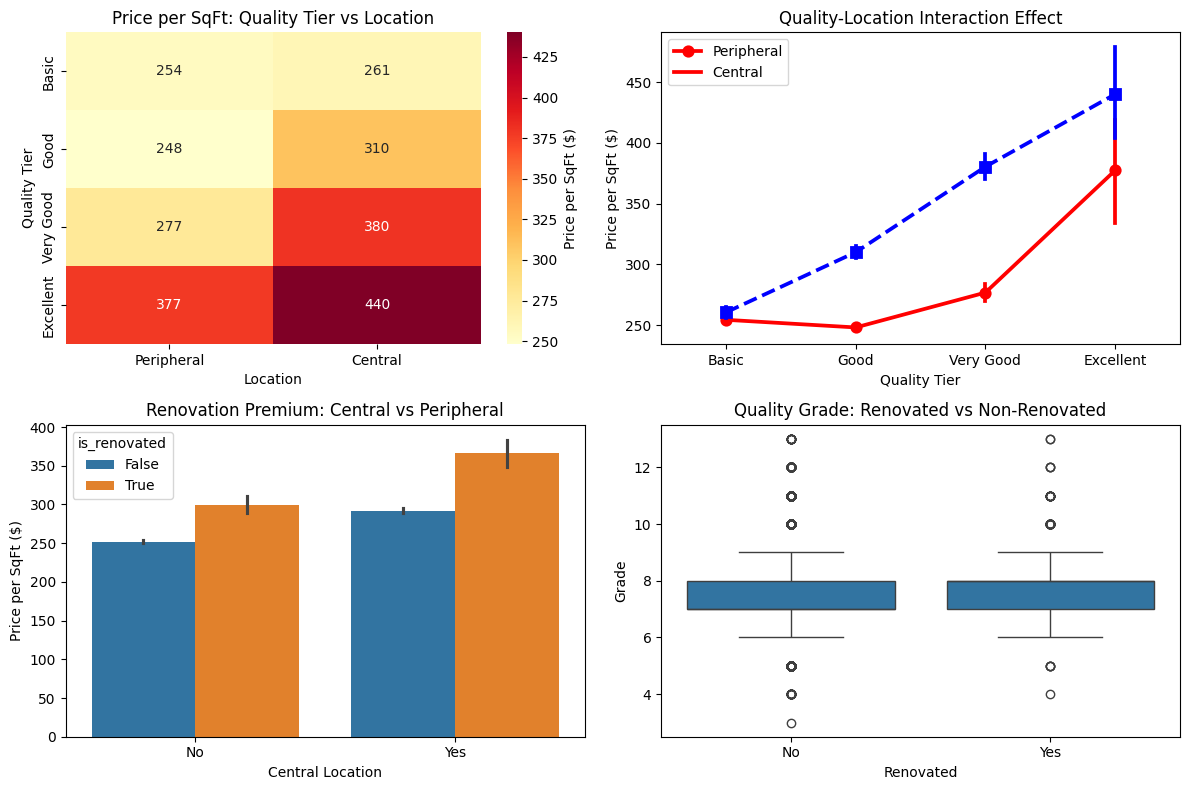

In [14]:
obj2.vis_interaction_effects(df)

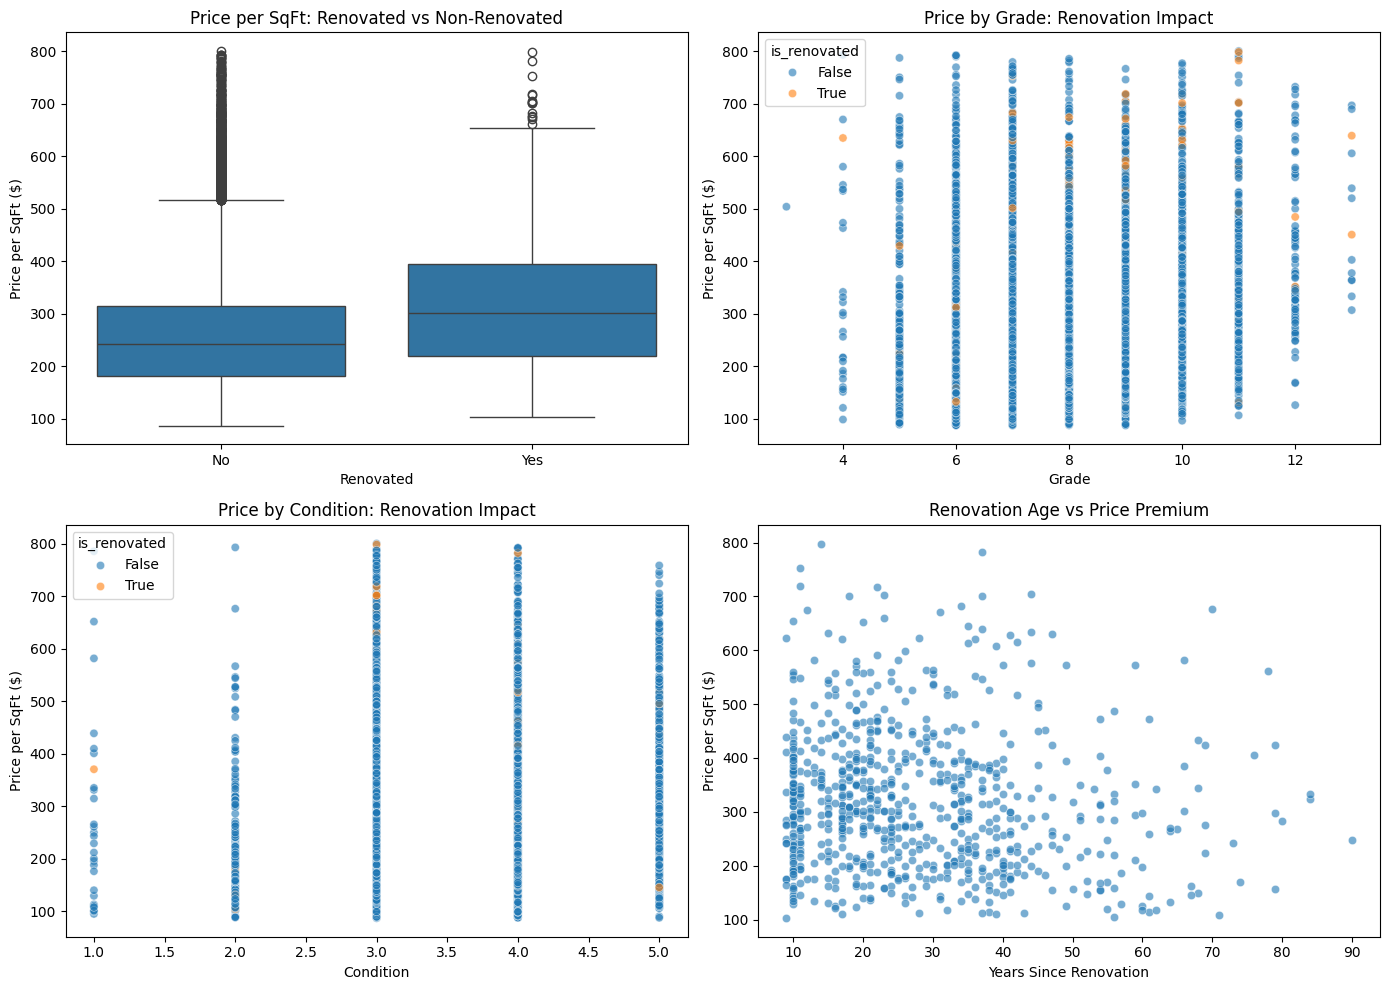

In [15]:
obj2.vis_main_plot(df)


# Hypothesis 1

In [16]:
from eda_hypothesis import Hypothesis, FinalRecommendation

47.56019729691877 0.12660596784988776 -122.21378370588236 0        0.065333
1        0.192167
2        0.178739
3        0.183496
4        0.178022
           ...   
21592    0.191913
21593    0.156263
21594    0.091824
21595    0.147046
21596    0.091713
Name: distance_from_center, Length: 21420, dtype: float64 0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594     True
21595    False
21596     True
Name: is_central, Length: 21420, dtype: bool
Correlation Matrix:
                      distance_from_center     price  price_per_sqft
distance_from_center              1.000000 -0.247832       -0.293673
price                            -0.247832  1.000000        0.556883
price_per_sqft                   -0.293673  0.556883        1.000000

Correlation Strength Comparison:
sqft_vs_price       : +0.702
grade_vs_price      : +0.668
distance_vs_price   : -0.248
condition_vs_price  : +0.035
T-test results: t=22.14, p-val

c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:260: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_premium = df.groupby('quality_tier')['price_per_sqft'].mean()
c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:261: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_premium = df.groupby('condition_tier')['price_per_sqft'].mean()
c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:260: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

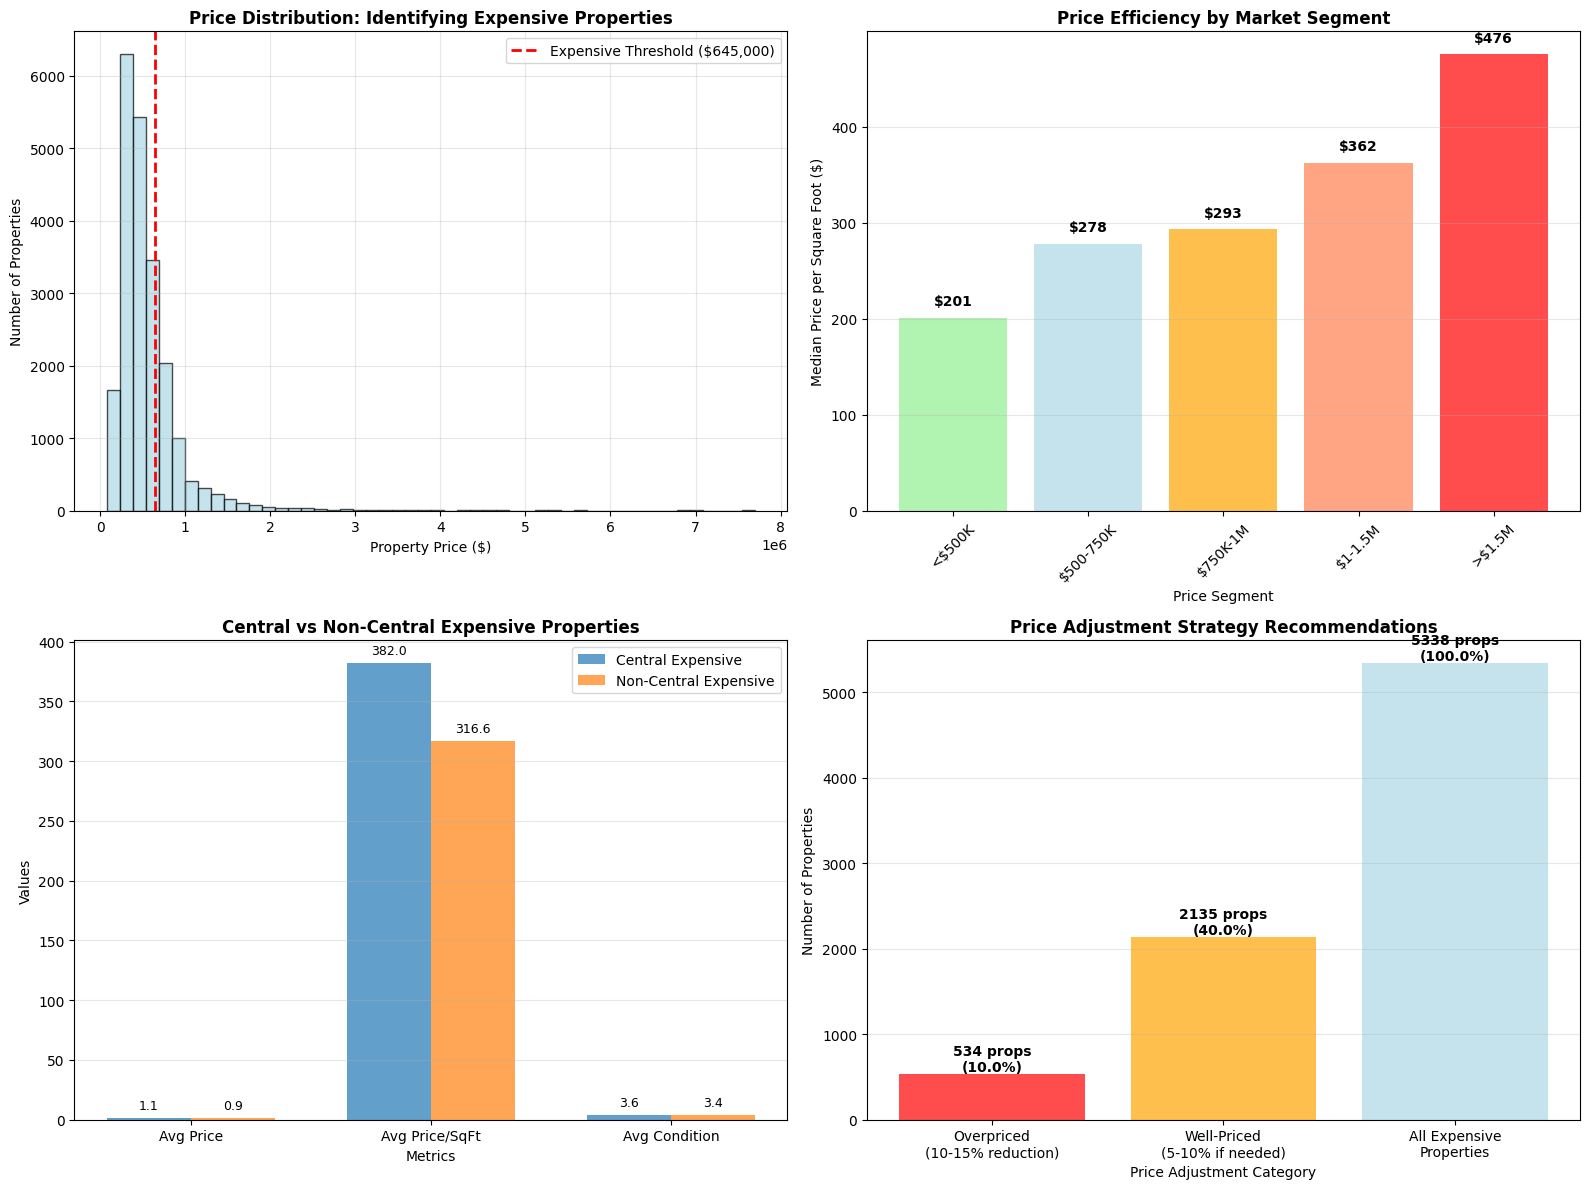


CREATING STRATEGIC DECISION MATRIX...


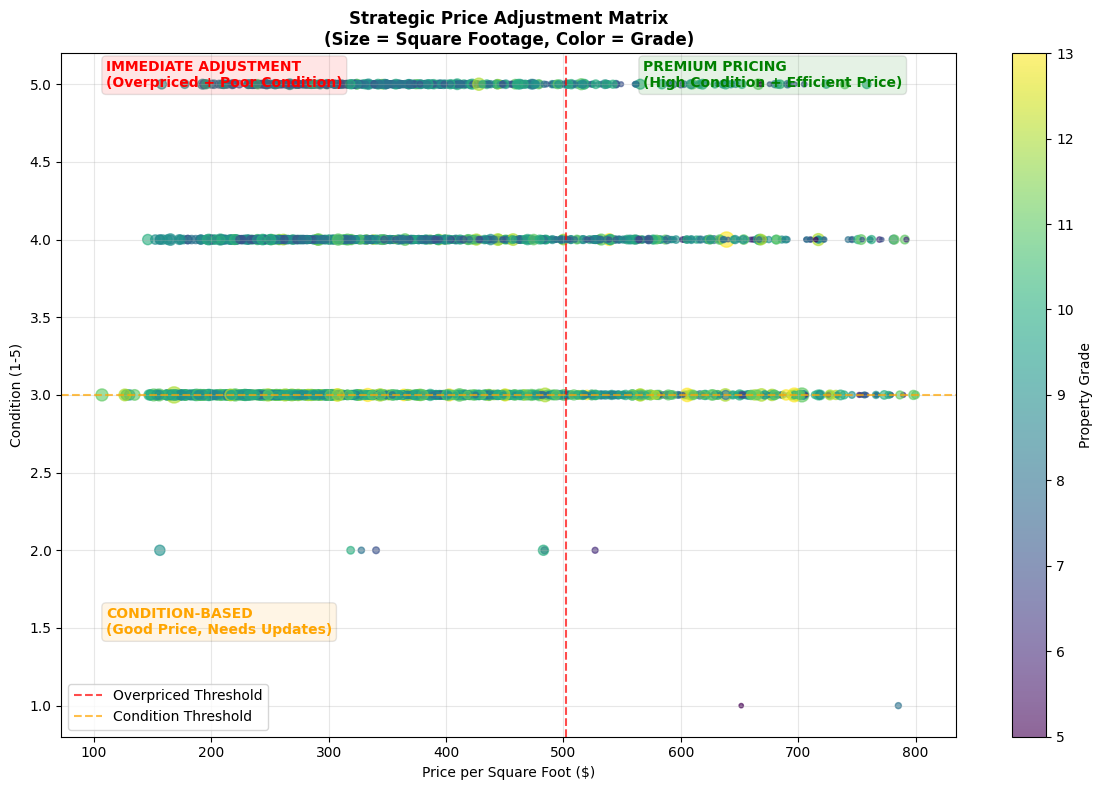


HYPOTHESIS 1 ANALYSIS COMPLETED!


(               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
 0      7129300520         3          1         1180      5650       1   
 1      6414100192         3          2         2570      7242       2   
 2      5631500400         2          1          770     10000       1   
 3      2487200875         4          3         1960      5000       1   
 4      1954400510         3          2         1680      8080       1   
 ...           ...       ...        ...          ...       ...     ...   
 21592   263000018         3          2         1530      1131       3   
 21593  6600060120         4          2         2310      5813       2   
 21594  1523300141         2          0         1020      1350       2   
 21595   291310100         3          2         1600      2388       2   
 21596  1523300157         2          0         1020      1076       2   
 
        waterfront  view  condition  grade  ...   price  price_per_sqft  \
 0               0     0          3

In [17]:
df = Hypothesis().df_2.copy()
Hypothesis().run_complete_hypothesis_1_analysis(df)

# Final Recommendation

In [18]:
from eda_hypothesis import Hypothesis, FinalRecommendation

map, top_3 = FinalRecommendation().run_property_recommendation_with_map(df)

47.56019729691877 0.12660596784988776 -122.21378370588236 0        0.065333
1        0.192167
2        0.178739
3        0.183496
4        0.178022
           ...   
21592    0.191913
21593    0.156263
21594    0.091824
21595    0.147046
21596    0.091713
Name: distance_from_center, Length: 21420, dtype: float64 0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594     True
21595    False
21596     True
Name: is_central, Length: 21420, dtype: bool
Correlation Matrix:
                      distance_from_center     price  price_per_sqft
distance_from_center              1.000000 -0.247832       -0.293673
price                            -0.247832  1.000000        0.556883
price_per_sqft                   -0.293673  0.556883        1.000000

Correlation Strength Comparison:
sqft_vs_price       : +0.702
grade_vs_price      : +0.668
distance_vs_price   : -0.248
condition_vs_price  : +0.035
T-test results: t=22.14, p-val

c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:260: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_premium = df.groupby('quality_tier')['price_per_sqft'].mean()
c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:261: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_premium = df.groupby('condition_tier')['price_per_sqft'].mean()
c:\Vab\Data-Science\spiced-academy\1-Project\ds-eda-project\eda_hypothesis.py:260: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F


TOP 3 PROPERTY RECOMMENDATIONS

#1 PROPERTY 1924059248
 Strategy: STANDARD SALE
 Price: $870,000
 Size: 4,500 sqft ($193/sqft)
 Layout: 4 bed, 3 bath
 Quality: Condition 3/5, Grade 9/13
 Score: 84.7/100

#2 PROPERTY 7598100735
 Strategy: QUICK SALE
 Price: $769,000
 Size: 3,630 sqft ($212/sqft)
 Layout: 4 bed, 2 bath
 Quality: Condition 4/5, Grade 8/13
 Score: 82.9/100
 Action: List immediately at current price

#3 PROPERTY 5450900140
 Strategy: STANDARD SALE
 Price: $830,000
 Size: 3,040 sqft ($273/sqft)
 Layout: 5 bed, 3 bath
 Quality: Condition 5/5, Grade 9/13
 Score: 82.6/100

TOTAL PORTFOLIO VALUE: $2,469,000
AVERAGE SCORE: 83.4/100
STRATEGIES: STANDARD SALE, QUICK SALE

 MAP INSTRUCTIONS:
 Red/Blue/Green markers = Your top 3 recommendations
 Black star = City center point
 Blue circle = Central area boundary
 Gray dots = Other central properties for context

INTERACTIVE MAP SAVED: property_recommendations_map.html
 Open this file in your browser to view the recommendations!
